<a href="https://colab.research.google.com/github/BrittonWinterrose/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#set pd windows
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# data source 
data = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
# add attribute names to import
h_names = ['age_of_patient','operation_year','positive_nodes_detected','survival_status']
# import data as pandas dataframe
df = pd.read_csv(data, header = None, names = h_names)

In [2]:
# documentation says 306 rows with 4 columns
df.count()
# count finds 306 rows with 4 attibute columns. Has correct # of observations

age_of_patient             306
operation_year             306
positive_nodes_detected    306
survival_status            306
dtype: int64

In [3]:
df.isna().sum()
#no missing values

age_of_patient             0
operation_year             0
positive_nodes_detected    0
survival_status            0
dtype: int64

In [4]:
df['survival_status'].replace(2, 0, inplace = True)
df.head(8)

,age_of_patient,operation_year,positive_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [5]:
df.describe()

,age_of_patient,operation_year,positive_nodes_detected,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [6]:
died_or_survived = df.groupby('survival_status')
died_or_survived.describe()

age_of_patient                                                     operation_year                                                    positive_nodes_detected                                               
                         count       mean        std   min   25%   50%   75%   max          count       mean       std   min   25%   50%   75%   max                   count      mean       std  min  25%  50%   75%   max
survival_status                                                                                                                                                                                                            
0                         81.0  53.679012  10.167137  34.0  46.0  53.0  61.0  83.0           81.0  62.827160  3.342118  58.0  59.0  63.0  65.0  69.0                    81.0  7.456790  9.185654  0.0  1.0  4.0  11.0  52.0
1                        225.0  52.017778  11.012154  30.0  43.0  52.0  60.0  77.0          225.0  62.862222  3.222915  58.0  60.0  63.0  66.0  69.0                   225.0  2.791111  5.870318  0.0  0.0  0.0   3.0  46.0

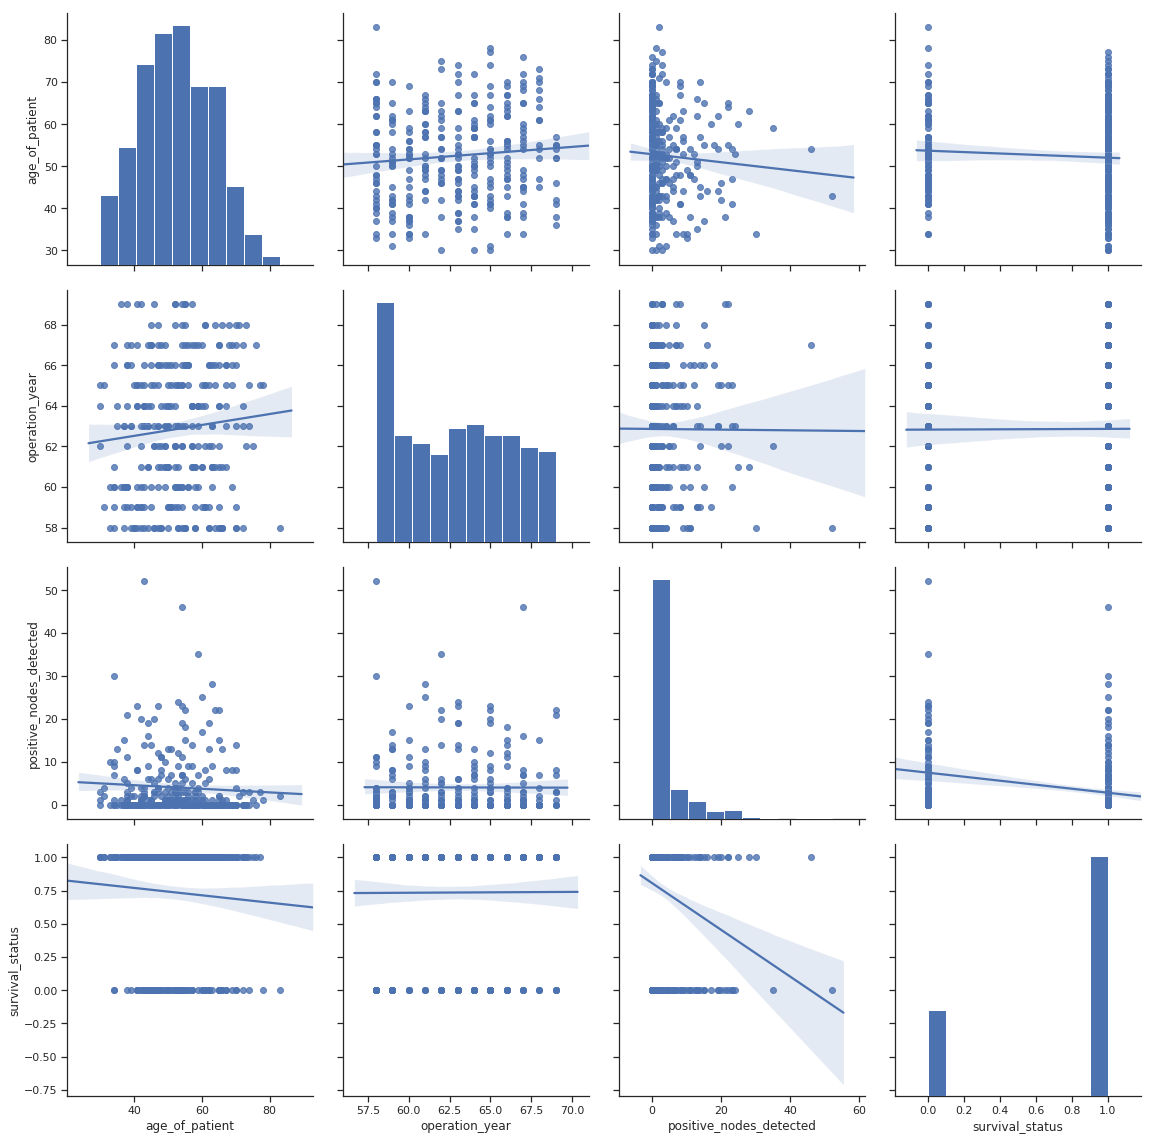

In [7]:
!pip install seaborn --upgrade
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, height = 4, kind='reg')
#g.map(plt.scatter, alpha=0.7)

In [0]:
df['positive_nodes_bin'] = pd.cut(df['positive_nodes_detected'],[-1, 0, 5, 15, 30, 60], labels = [0, 5, 15, 30, 60])


In [44]:
pd.crosstab(df['positive_nodes_bin'],df['survival_status'])

survival_status,0,1
positive_nodes_bin,,
0,19,117
5,27,73
15,23,25
30,10,9
60,2,1


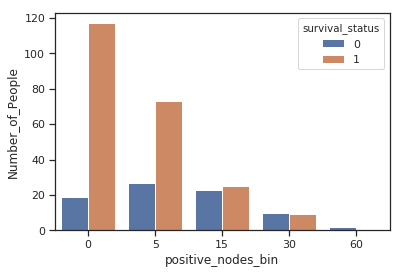

In [54]:
ct = pd.crosstab(df['positive_nodes_bin'],df['survival_status'])
stacked = ct.stack().reset_index().rename(columns={0:'Number_of_People'})

sns.barplot(x=stacked.positive_nodes_bin, y=stacked.Number_of_People, hue=stacked.survival_status)

In [55]:
pd.crosstab(df['operation_year'],df['survival_status'])

survival_status,0,1
operation_year,,
58,12,24
59,9,18
60,4,24
61,3,23
62,7,16
63,8,22
64,8,23
65,13,15
66,6,22


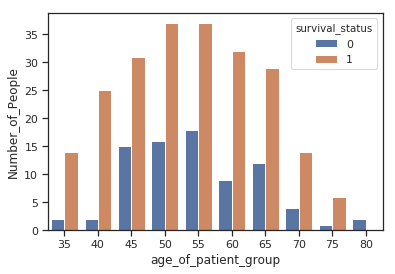

In [62]:
df['age_of_patient_group'] = pd.cut(df['age_of_patient'],10.6, labels = [35,40,45,50,55,60,65,70,75,80], precision = 0)
ct = pd.crosstab(df['age_of_patient_group'],df['survival_status'])
stacked = ct.stack().reset_index().rename(columns={0:'Number_of_People'})

sns.barplot(x=stacked.age_of_patient_group, y=stacked.Number_of_People, hue=stacked.survival_status)

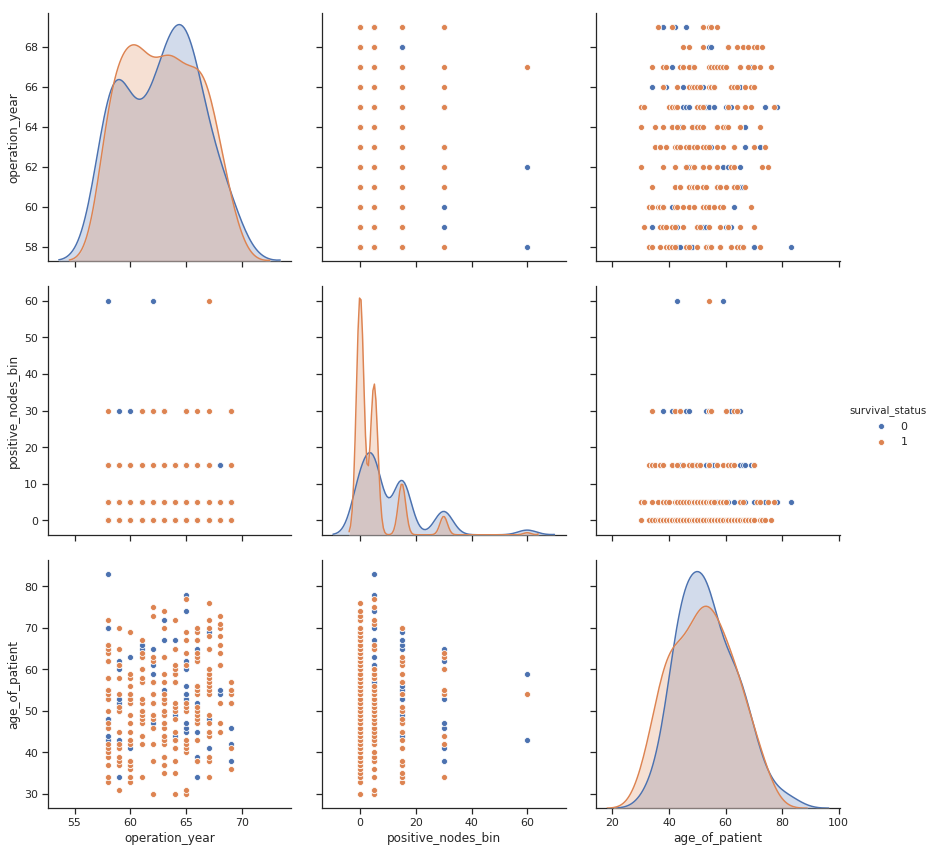

In [46]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars = ["operation_year", 'positive_nodes_bin', "age_of_patient"],height = 4, hue = 'survival_status')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### Part 3 Answer

#### One feature that looks to have a positive correlation with survival would be early detection of the cancer, ideally before age 40 and ideally any positive axillary nodes are detected.

#### One feature that looks to have a negative correlation with survival is finding positive auxillary nodes. After finding more than 5 positive auxillary nodes the chances of survival decrease. 

#### These two features can be related to each other.  Cancer grows even when undetected and if the cancer begins in the late thirties then monitoring for and detecting it between the ages of 30 and 40 can mean detecting it before it gets to the auxillary nodes and improve the likelihood of successul surgery. 

